<a href="https://colab.research.google.com/github/rayotoo/nlp_GO_terms/blob/main/nlp_GO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 
## Description: Systematic roll up of annotation terms from a broad set of sources.

The planned outcome is a method to classify/aggregate terms for end-users in a systematic, explainable, and defensible way. The intention is to help end-users when they are ask, “what does your platform cover?”. That is a complex question that depends on what is of interest to the users and the context of the question but providing a list of 7000 features with some annotation or links is not a satisfying answer.

## Outcome
The ideal outcome is to be able to respond to a user: ‘What is your primary area of interest?’ then go to a high-level classification of terms related to the user’s interest and approach to proteomics (and be able to drill down from that high level).

In [ ]:
pip install sentence_transformers

In [7]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [8]:
#import required libraries
#import os
import pandas as pd

#1. Preprocess the GO Biological Process Data 

In [10]:
#This file contains all of the GO biological process annotatations.  Some are missing GO ID's,these exist in UniProt but are depricated in GO. 
#There is a need to curate and update these annotations. Each row consists of a single GO annotation, its go id, the type of relationship it has to its parent term(s), and a pipe '|' delimited list of parent GO Id's 
GO_BiologicalProcess_GO_Relationships_20220615 = pd.read_csv('GO_BiologicalProcess_GO_Relationships_20220615.csv')
GO_BiologicalProcess_GO_Relationships_20220615

,go_name,go_id,rel_type,parent_terms
0,coenzyme biosynthetic process,NaN,NaN,NaN
1,evasion or tolerance by symbiont of host-produ...,NaN,NaN,NaN
2,evasion or tolerance by symbiont of host-produ...,NaN,NaN,NaN
3,entry of bacterium into host cell,GO:0035635,INSTANCE_OF,NaN
4,entry into host cell,NaN,NaN,NaN
...,...,...,...,...
29196,gliotoxin biosynthetic process,GO:2001310,IS_A,GO:0044272|GO:0018130|GO:1901605|GO:2001308|GO...
29197,6-sulfoquinovose(1-) catabolic process to glyc...,GO:0061720,IS_A,GO:0006796|GO:0006081|GO:0019637|GO:1902652|GO...
29198,novobiocin biosynthetic process,GO:0043642,IS_A,GO:1901566|GO:0017000|GO:1901503|GO:0043604|GO...
29199,doxorubicin metabolic process,GO:0044598,IS_A,GO:0006725|GO:0006807|GO:1901661|GO:1901360|GO...


In [11]:
#Using main list of GO terms
GO_BiologicalProcess_GO_Relationships_20220615

,go_name,go_id,rel_type,parent_terms
0,coenzyme biosynthetic process,NaN,NaN,NaN
1,evasion or tolerance by symbiont of host-produ...,NaN,NaN,NaN
2,evasion or tolerance by symbiont of host-produ...,NaN,NaN,NaN
3,entry of bacterium into host cell,GO:0035635,INSTANCE_OF,NaN
4,entry into host cell,NaN,NaN,NaN
...,...,...,...,...
29196,gliotoxin biosynthetic process,GO:2001310,IS_A,GO:0044272|GO:0018130|GO:1901605|GO:2001308|GO...
29197,6-sulfoquinovose(1-) catabolic process to glyc...,GO:0061720,IS_A,GO:0006796|GO:0006081|GO:0019637|GO:1902652|GO...
29198,novobiocin biosynthetic process,GO:0043642,IS_A,GO:1901566|GO:0017000|GO:1901503|GO:0043604|GO...
29199,doxorubicin metabolic process,GO:0044598,IS_A,GO:0006725|GO:0006807|GO:1901661|GO:1901360|GO...


In [ ]:
#convert the GO terms to a list
GO_terms_list = GO_BiologicalProcess_GO_Relationships_20220615['go_name'].tolist()
GO_terms_list

In [15]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/555 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/505 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

# 2. Cluster the GO terms into the most similar terms using some pretrained models as a starting point for the clustering. A more specific model could be trained as need be should the available pretrained models perform poorly as per the context in question.

In [16]:
 #Took about 12 mins to run when ran on colab's server.
corpus_embeddings = embedder.encode(GO_terms_list)

In [64]:
from sklearn.cluster import KMeans
num_clusters = 10

# Define kmeans model
clustering_model = KMeans(n_clusters=num_clusters)

In [65]:
# Fit the embedding with kmeans clustering.
clustering_model.fit(corpus_embeddings)
# Get the cluster id assigned to each GO term.
cluster_assignment = clustering_model.labels_

In [66]:
print(cluster_assignment)

[4 9 5 ... 2 9 2]


In [67]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(GO_terms_list[sentence_id])

#loop through the cluster and print each clustered along with its assigned term as suggested by the model
for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['regulation of blood pressure', 'light-induced release of internally sequestered calcium ion', 'regulation of stomatal movement', 'circadian rhythm', 'blood coagulation', 'blood coagulation', 'muscle contraction', 'regulation of cardiac conduction', 'muscle filament sliding', 'muscle filament sliding', 'mitochondrial calcium ion transmembrane transport', 'mitochondrial calcium ion transmembrane transport', 'endothelial cell activation within high endothelial venule involved in immune response', 'hepatic immune response', 'calcium ion transport', 'regulation of muscle contraction', 'smooth muscle contraction', 'regulation of smooth muscle contraction', 'striated muscle contraction', 'regulation of striated muscle contraction', 'hypotonic response', 'vacuolar calcium ion homeostasis', 'calcium-independent cell-matrix adhesion', 'positive regulation of cytosolic calcium ion concentration', 'nervous system development', 'central nervous system development', 'heart development',

In [88]:
#GO_clusters = pd.DataFrame(clustered_sentences)
#Transpose to convert the rows to columns and vice versa
final_GO_clusters = pd.DataFrame(clustered_sentences).transpose()
final_GO_clusters

,0,1,2,3,4,5,6,7,8,9
0,regulation of blood pressure,negative gravitropism,retrograde axonal transport,mesodermal cell migration,coenzyme biosynthetic process,evasion or tolerance by symbiont of host-produ...,entry of bacterium into host cell,regulation of smoothened signaling pathway,regulation of G protein-coupled receptor signa...,evasion or tolerance by symbiont of host-produ...
1,light-induced release of internally sequestere...,negative regulation of epidermal growth factor...,actin polymerization or depolymerization,axo-dendritic transport,2-oxoglutarate metabolic process,biological_process,entry into host cell,soluble molecule recognition,gurken signaling pathway,porphyrin-containing compound metabolic process
2,regulation of stomatal movement,negative regulation of axonogenesis,protein alkylation,cell death,7-methylguanosine metabolic process,maternal determination of dorsal/ventral axis,viral entry into host cell,brassinosteroid homeostasis,regulation of cell size,metabolic process
3,circadian rhythm,negative regulation of cysteine-type endopepti...,protein dealkylation,cell population proliferation,glutamine family amino acid metabolic process,maternal determination of dorsal/ventral axis,active induction of host immune response by virus,positive regulation of axonogenesis,regulation of Wnt signaling pathway,glucocorticoid metabolic process
4,blood coagulation,negative regulation of Notch signaling pathway,attachment of spindle microtubules to kinetochore,glial cell migration,aspartate family amino acid metabolic process,anterograde axonal transport,pathogenesis,positive regulation of neurotrophin TRK recept...,regulation of Toll signaling pathway,spermine metabolic process
...,...,...,...,...,...,...,...,...,...,...
4082,None,None,None,None,terrequinone A biosynthetic process,None,None,None,None,None
4083,None,None,None,None,leukotriene A4 catabolic process,None,None,None,None,None
4084,None,None,None,None,leukotriene A4 biosynthetic process,None,None,None,None,None
4085,None,None,None,None,verruculogen biosynthetic process,None,None,None,None,None


In [80]:
#View the number of terms assigned to each cluster(category)
final_GO_clusters.count()

0    1448
1    3227
2    3449
3    3246
4    4087
5    3842
6    1456
7    2849
8    3251
9    2346
dtype: int64

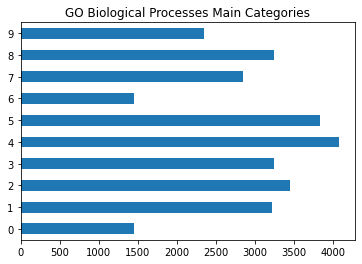

In [90]:
#Counts the non-na entries in the dataframe and columns 
final_GO_clusters.count().plot(kind='barh',title='GO Biological Processes Main Categories')

# 2. To tag each of the clusters, the most representative keyword can be usaed, modeling the data to suit the keyBERT model. KeyBERT model can be found here: https://github.com/MaartenGr/KeyBERT